In [250]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [255]:
user_oldfile = pd.read_csv('data/datalist.csv')
infomations = pd.read_csv('data/infomations_store.csv',index_col=0)
response = pd.read_csv('data/Form.csv',index_col=0)

In [256]:
user_interactions = user_oldfile.iloc[0:,[6,0,2,3]]

In [257]:
user_interactions[user_interactions['User_ID'] == 35]

,User_ID,Store_ID,User,Rating
1,35,0,vanai sun,3
850,35,6,vanai sun,4
1006,35,7,vanai sun,4


In [258]:
store = store.drop_duplicates()

TypeError: 'Collection' object is not callable. If you meant to call the 'drop_duplicates' method on a 'Collection' object it is failing because no such method exists.

In [259]:
user_interactions.head()

,User_ID,Store_ID,User,Rating
0,34,0,Nuunet D.,5
1,35,0,vanai sun,3
2,36,0,Phonanan Seeon,5
3,37,0,Chavakorn Laophetsakunchai,5
4,38,0,community man,5


In [611]:
users_items_pivot_matrix_df = user_interactions.pivot_table(index="User_ID",columns="Store_ID",values='Rating').fillna(0)

In [576]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values

In [577]:
users_items_pivot_matrix

array([[5., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [5., 0., 5., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.]])

In [578]:
users_ids = list(users_items_pivot_matrix_df.index)

In [579]:
users_items_pivot_matrix_df

Store_ID,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
User_ID,,,,,,,,,,,,,,,,,,,,,
34,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,5.0,0.0,5.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [580]:
U, sigma, Vt = svds(users_items_pivot_matrix)
A_reconstructed = U.dot(np.diag(sigma)).dot(Vt)


In [581]:
sigma

array([60.90863996, 61.77898698, 66.4517305 , 70.74657236, 79.98701331,
       93.93942365])

In [582]:
A_reconstructed

array([[ 3.42507685,  0.51976395,  0.42694742, ...,  0.16996114,
        -0.20439947,  0.18868967],
       [ 1.98965376,  0.40705943,  0.35341839, ...,  0.17881815,
        -0.00708548,  0.19316472],
       [ 5.49490453,  0.87133846,  0.72170912, ...,  0.30400738,
         0.0860595 ,  0.32985059],
       ...,
       [ 0.18868967,  0.03354501,  0.0279609 , ...,  0.01167916,
        -0.02464764,  0.01705667],
       [ 0.18868967,  0.03354501,  0.0279609 , ...,  0.01167916,
        -0.02464764,  0.01705667],
       [ 0.18868967,  0.03354501,  0.0279609 , ...,  0.01167916,
        -0.02464764,  0.01705667]])

In [583]:
sigma

array([60.90863996, 61.77898698, 66.4517305 , 70.74657236, 79.98701331,
       93.93942365])

In [584]:
Vt

array([[-7.56781078e-01, -1.02422907e-01, -8.09206641e-02,
         2.33152939e-01, -1.50393427e-01,  5.28535045e-02,
         4.03397235e-01, -3.08921827e-02, -4.44444094e-02,
        -3.19460827e-02, -7.78955308e-02, -4.63720113e-02,
        -5.85504602e-02, -4.69503210e-03, -4.48240174e-02,
        -6.11315001e-03, -4.37669307e-02,  5.38208168e-04,
        -2.71916202e-01, -1.13961045e-01, -1.50313279e-02,
         1.18437990e-01,  1.41880161e-03,  1.21191062e-02,
        -4.93876593e-02, -1.10595794e-02, -4.46477461e-02,
        -7.11178881e-03, -1.32816510e-01,  1.17133666e-03,
        -1.09304258e-01, -2.74604779e-02,  1.04797472e-01,
        -3.00441846e-02],
       [-3.81308697e-03, -2.29161049e-02, -1.79266706e-02,
        -5.21067077e-02, -1.01357519e-02,  9.48904516e-02,
        -3.12692003e-02,  5.95533686e-02, -3.67895980e-03,
        -3.85596811e-03, -6.41170930e-03, -1.29622415e-02,
        -1.63263550e-02, -1.79100892e-03,  2.04196332e-02,
        -3.04509992e-03, -3.78

In [585]:
mse = np.mean((users_items_pivot_matrix - A_reconstructed)**2)

In [586]:
mse

0.44884180452143185

In [587]:
rmse = np.sqrt(mse)

In [588]:
rmse

0.6699565691307399

In [589]:
nrmse = rmse / (np.max(users_items_pivot_matrix) - np.min(users_items_pivot_matrix))

In [590]:
nrmse

0.13399131382614798

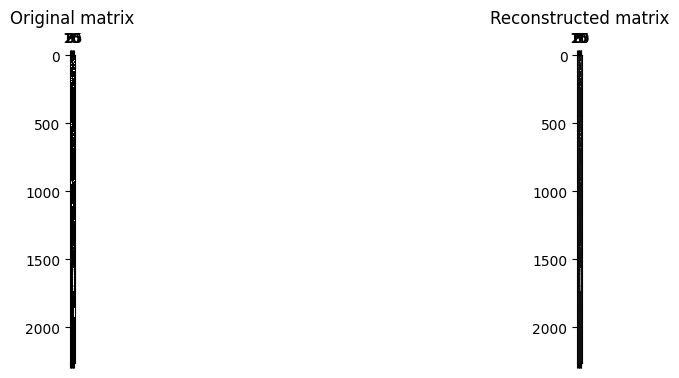

In [489]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].matshow(users_items_pivot_matrix, cmap='gray')
ax[0].set_title("Original matrix")
ax[1].matshow(A_reconstructed, cmap='gray')
ax[1].set_title("Reconstructed matrix")
plt.show()

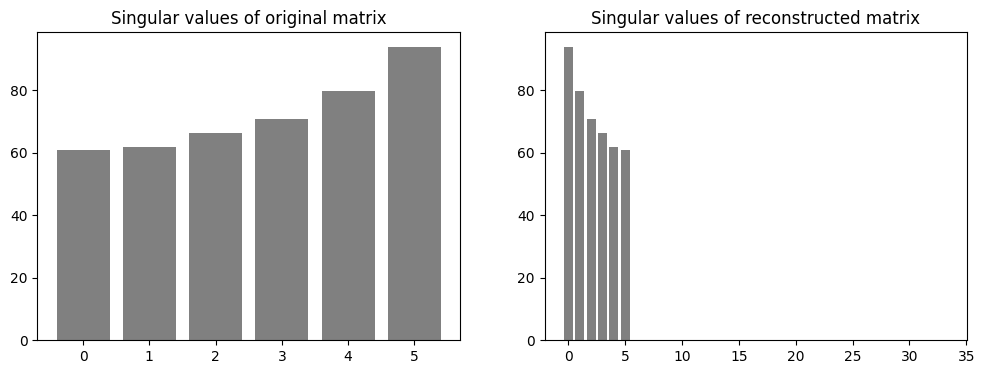

In [490]:
U_reconstructed, S_reconstructed, VT_reconstructed = np.linalg.svd(A_reconstructed)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(np.arange(len(sigma)), sigma, color='gray')
ax[0].set_title("Singular values of original matrix")
ax[1].bar(np.arange(len(S_reconstructed)), S_reconstructed, color='gray')
ax[1].set_title("Singular values of reconstructed matrix")
plt.show()

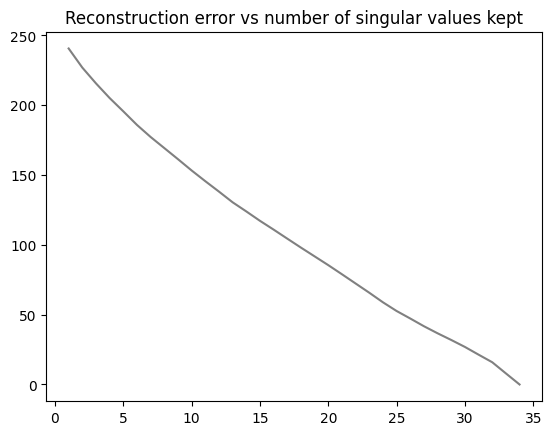

In [491]:

A = users_items_pivot_matrix 
U, S, VT = np.linalg.svd(users_items_pivot_matrix)

reconstruction_errors = []
for k in range(1, len(S)+1):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    A_reconstructed = U_k.dot(S_k).dot(VT_k)
    reconstruction_errors.append(np.linalg.norm(A - A_reconstructed))

fig, ax = plt.subplots()
ax.plot(range(1, len(S)+1), reconstruction_errors, color='gray')
ax.set_title("Reconstruction error vs number of singular values kept")
plt.show()

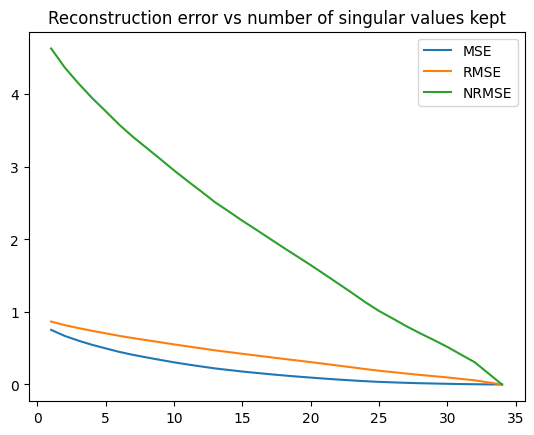

In [492]:
mse = []
rmse = []
nrmse = []
for k in range(1, len(S)+1):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    A_reconstructed = U_k.dot(S_k).dot(VT_k)
    error = A - A_reconstructed
    mse.append(np.mean(error**2))
    rmse.append(np.sqrt(np.mean(error**2)))
    nrmse.append(np.sqrt(np.mean(error**2))/np.mean(A))

fig, ax = plt.subplots()
ax.plot(range(1, len(S)+1), mse, label='MSE')
ax.plot(range(1, len(S)+1), rmse, label='RMSE')
ax.plot(range(1, len(S)+1), nrmse, label='NRMSE')
ax.set_title("Reconstruction error vs number of singular values kept")
ax.legend()
plt.show()

In [399]:
from sklearn.model_selection import KFold

In [463]:
kf = KFold(n_splits = 3)

In [464]:
for train,test in kf.split(users_items_pivot_matrix_df):
    data_train = users_items_pivot_matrix_df.iloc[train]
    data_test = users_items_pivot_matrix_df.iloc[test]

In [465]:
data_test

Store_ID,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
User_ID,,,,,,,,,,,,,,,,,,,,,
1544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [466]:
data_train

Store_ID,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
User_ID,,,,,,,,,,,,,,,,,,,,,
34,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,5.0,0.0,5.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
test.shape

(754,)

In [468]:
U, S, VT = np.linalg.svd(data_train)

In [475]:
X_val_reconstructed.reshape(-1,1)

array([[0.58240554],
       [0.14365891],
       [0.12572101],
       ...,
       [0.09136853],
       [0.52734874],
       [0.09402721]])

In [477]:
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [507]:
kf = KFold(n_splits=3)
kf.split(A)

<generator object _BaseKFold.split at 0x0000015E2F842AC0>

In [508]:
kf.get_n_splits(A)

3

KFold(n_splits=2, random_state=None, shuffle=False)

In [510]:
for i, (train_index, test_index) in enumerate(kf.split(A)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index.shape}")
    print(f"  Test:  index={test_index.shape}")

Fold 0:
  Train: index=(1509,)
  Test:  index=(755,)
Fold 1:
  Train: index=(1509,)
  Test:  index=(755,)
Fold 2:
  Train: index=(1510,)
  Test:  index=(754,)


In [531]:
A[train_index].shape

(1509, 34)

In [537]:
min(len(S))

TypeError: 'int' object is not iterable

In [560]:
kf = KFold(n_splits=5)
kf.split(A)

<generator object _BaseKFold.split at 0x0000015E2FB73120>

In [562]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [565]:
from sklearn.model_selection import train_test_split

In [567]:
A.shape

(2264, 34)

# test

In [591]:
X_train, X_test, y_train, y_test = train_test_split(
   A_reconstructed, users_items_pivot_matrix, test_size=0.33, random_state=42)

In [594]:
X_train.shape

(1516, 34)

In [597]:
X_test.shape

(748, 34)

In [598]:
y_train.shape

(1516, 34)

In [599]:
y_test.shape

(748, 34)

In [643]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [644]:
users_items_pivot_matrix

array([[5., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [5., 0., 5., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.]])

In [645]:
user_interactions

,User_ID,Store_ID,User,Rating
0,34,0,Nuunet D.,5
1,35,0,vanai sun,3
2,36,0,Phonanan Seeon,5
3,37,0,Chavakorn Laophetsakunchai,5
4,38,0,community man,5
...,...,...,...,...
3209,2294,33,อาจณรงค์ กลมเกลียว,5
3210,2295,33,??,5
3211,2296,33,ประจงจิต จันทป,5
3212,1830,33,Chatthawat Warnjai,5


In [646]:
from surprise import Reader

In [647]:
min_rating = user_interactions.Rating.min()
max_rating = user_interactions.Rating.max()
 
reader = Reader(rating_scale=(min_rating, max_rating))

In [648]:
data = Dataset.load_from_df(user_interactions[['User_ID', 'Store_ID', 'Rating']], reader)

In [661]:
from surprise import SVD
from surprise.model_selection import cross_validate


svd = SVD()
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.7794  0.7038  0.7304  0.7527  0.7930  0.8219  0.7631  0.7636  0.7362  0.7284  0.7573  0.0330  
MAE (testset)     0.5958  0.5687  0.5753  0.5810  0.6004  0.6109  0.5886  0.5977  0.5854  0.5834  0.5887  0.0120  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    


In [662]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.5887113658494822
Average RMSE:  0.7572572204601056


In [664]:
from surprise import SVD
from surprise.model_selection import GridSearchCV
 
    
param_grid = {
  'n_factors': [20, 50, 100,200],
  'n_epochs': [5, 10, 20,50]
}



gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=20)
gs.fit(data)



print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.7463263261017868
{'n_factors': 20, 'n_epochs': 50}


In [639]:
from surprise.model_selection import train_test_split
 
# best hyperparameters
best_factor = gs.best_params['rmse']['n_factors']
best_epoch = gs.best_params['rmse']['n_epochs']
 
# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)
 
# We'll use the famous SVD algorithm.
svd = SVD(n_factors=best_factor, n_epochs=best_epoch)
 
# Train the algorithm on the trainset
svd.fit(trainset)

In [ ]:
def generate_recommendation(model, user_id, ratings_df, movies_df, n_items):
   # Get a list of all movie IDs from dataset
   movie_ids = ratings_df["movieId"].unique()
 
   # Get a list of all movie IDs that have been watched by user
   movie_ids_user = ratings_df.loc[ratings_df["userId"] == user_id, "movieId"]
    # Get a list off all movie IDS that that have not been watched by user
   movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_user)
 
   # Apply a rating of 4 to all interactions (only to match the Surprise dataset format)
   test_set = [[user_id, movie_id, 4] for movie_id in movie_ids_to_pred]
 
   # Predict the ratings and generate recommendations
   predictions = model.test(test_set)
   pred_ratings = np.array([pred.est for pred in predictions])
   print("Top {0} item recommendations for user {1}:".format(n_items, user_id))
   # Rank top-n movies based on the predicted ratings
   index_max = (-pred_ratings).argsort()[:n_items]
   for i in index_max:
       movie_id = movie_ids_to_pred[i]
       print(movies_df[movies_df["movieId"]==movie_id]["title"].values[0], pred_ratings[i])
 
 
# define which user ID that we want to give recommendation
userID = 23
# define how many top-n movies that we want to recommend
n_items = 10
# generate recommendation using the model that we have trained
generate_recommendation(svd,userID,ratings_data,movies_data,n_items)

In [559]:

best_k = None
best_error = float('inf')

for train_index, val_index in kf.split(A):
    X_train, X_val = A[train_index], A[val_index]
    U, S, VT = np.linalg.svd(X_train)
    for k in range(1, len(S)+1):
        S_k = np.diag(S[:k])
        U_k = U[:, :k]
        VT_k = VT[:k, :]
        X_val_reconstructed = U_k.dot(S_k).dot(VT_k)
        error = np.mean((X_val - X_val_reconstructed)**2)
        if error < best_error:
            best_error = error
            best_k = k


ValueError: operands could not be broadcast together with shapes (453,34) (1811,34) 

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [552]:
X_val_reconstructed.shape

(1509, 34)

In [555]:
X_val.shape

(755, 34)

In [546]:
X_val.reshape(-1,1).shape

(25670, 1)

In [521]:
U_k

array([[-0.0194798 ],
       [-0.03949798],
       [-0.04352093],
       ...,
       [-0.01568444],
       [-0.01254755],
       [-0.02827294]])

In [ ]:
U_reconstructed, S_reconstructed, VT_reconstructed = np.linalg.svd(A_reconstructed)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(np.arange(len(S)), S, color='gray')
ax[0].set_title("Singular values of original matrix")
ax[1].bar(np.arange(len(S_reconstructed)), S_reconstructed, color='gray')
ax[1].set_title("Singular values of reconstructed matrix")
plt.show()

In [253]:
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)
users_items_pivot_sparse_matrix

NameError: name 'users_items_pivot_matrix' is not defined

In [61]:
#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user item matrix
#U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)
U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)

In [62]:
U.shape

(2264, 15)

In [63]:
Vt.shape

(15, 34)

In [64]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [65]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 4.97719807e+00,  2.56110902e-01,  8.55451668e-02, ...,
         3.66238778e-02, -2.11614965e-03, -7.93803107e-03],
       [ 2.98391296e+00,  9.59150353e-02,  2.52521566e-02, ...,
         1.67009856e-01, -1.20679790e-03, -4.77645912e-02],
       [ 4.95734769e+00,  1.25532105e+00,  1.35953498e+00, ...,
         1.05131326e+00, -2.78836053e-02,  2.47403770e-01],
       ...,
       [-7.93803107e-03,  5.83350992e-02,  6.35243121e-02, ...,
        -1.26380236e-02, -2.62659715e-02,  1.34903574e-01],
       [-7.93803107e-03,  5.83350992e-02,  6.35243121e-02, ...,
        -1.26380236e-02, -2.62659715e-02,  1.34903574e-01],
       [-7.93803107e-03,  5.83350992e-02,  6.35243121e-02, ...,
        -1.26380236e-02, -2.62659715e-02,  1.34903574e-01]])

In [666]:
A.shape

(2264, 34)

In [667]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
kf = KFold(n_splits=5)

# Define a variable to store the best value of k
best_k = None
best_error = float('inf')

# Load the data
A = users_items_pivot_matrix # Replace with your data

# Split the data into training and validation sets using k-fold cross-validation
for train_index, val_index in kf.split(A):
    X_train, X_val = A[train_index], A[val_index]
    
    # Perform SVD on the training data
    U, S, VT = np.linalg.svd(X_train)
    
    # Loop over different values of k to find the best value of k
    for k in range(1, len(S)+1):
        S_k = np.diag(S[:k])
        U_k = U[:, :k]
        VT_k = VT[:k, :]
        
        # Reconstruct the validation data using the best k
        X_val_reconstructed = U_k.dot(S_k).dot(VT_k)
        
        # Reshape the validation data to match the shape of the reconstructed data
        X_val = X_val.reshape(-1, VT_k.shape[1])
        
        # Calculate the mean squared error between the original and reconstructed validation data
        error = np.mean((X_val - X_val_reconstructed)**2)
        
        # If the error is lower than the current best error, update the best error and k
        if error < best_error:
            best_error = error
            best_k = k

# Use the best value of k found in cross-validation to perform SVD on the entire dataset
U, S, VT = np.linalg.svd(A)
S_best = np.diag(S[:best_k])
U_best = U[:, :best_k]
VT_best = VT[:best_k, :]


ValueError: operands could not be broadcast together with shapes (453,34) (1811,34) 

In [66]:
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())

In [67]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head(10)

,34,35,36,37,38,39,40,41,42,43,...,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297
Store_ID,,,,,,,,,,,,,,,,,,,,,
0,0.787015,0.521717,0.784373,0.839000,0.781878,0.816042,0.787015,0.680130,0.654526,0.818313,...,0.123513,0.123513,0.123513,0.123513,0.123724,0.123513,0.123513,0.123513,0.123513,0.123513
1,0.158657,0.137335,0.291648,0.259740,0.188589,0.242184,0.158657,0.344038,0.151839,0.223502,...,0.132334,0.132334,0.132334,0.132334,0.130781,0.132334,0.132334,0.132334,0.132334,0.132334
2,0.135955,0.127930,0.305518,0.242279,0.186202,0.196646,0.135955,0.327005,0.133678,0.194768,...,0.133024,0.133024,0.133024,0.133024,0.131333,0.133024,0.133024,0.133024,0.133024,0.133024
3,0.124427,0.122382,0.107287,0.137324,0.113862,0.650373,0.124427,0.109133,0.124455,0.779130,...,0.136599,0.136599,0.136599,0.136599,0.134193,0.136599,0.136599,0.136599,0.136599,0.136599
4,0.119432,0.104258,0.676567,0.361834,0.690634,0.171284,0.119432,0.121950,0.120459,0.086490,...,0.173964,0.173964,0.173964,0.173964,0.164085,0.173964,0.173964,0.173964,0.173964,0.173964
5,0.122379,0.118870,0.101591,0.150329,0.109284,0.138387,0.122379,0.153013,0.122817,0.144337,...,0.130587,0.130587,0.130587,0.130587,0.129383,0.130587,0.130587,0.130587,0.130587,0.130587
6,0.124374,0.652771,0.107232,0.142203,0.114718,0.652096,0.124374,0.651724,0.124413,0.120179,...,0.119639,0.119639,0.119639,0.119639,0.120625,0.119639,0.119639,0.119639,0.119639,0.119639
7,0.124364,0.651775,0.635115,0.129520,0.112484,0.122593,0.124364,0.129015,0.124405,0.115697,...,0.122345,0.122345,0.122345,0.122345,0.122790,0.122345,0.122345,0.122345,0.122345,0.122345
8,0.134621,0.131764,0.223637,0.195053,0.171830,0.182478,0.134621,0.226822,0.132610,0.192446,...,0.132756,0.132756,0.132756,0.132756,0.131119,0.132756,0.132756,0.132756,0.132756,0.132756


In [68]:
len(cf_preds_df.columns)

2264

In [244]:
def recommendations(user_id, user_item_matrix, num_recommendations,num_components):
    # Perform SVD on the user-item matrix
    U, sigma, Vt = svds(user_item_matrix, k = num_components)
    
    
    # Get the user's row from the U matrix
    user_row = U[user_id, :]

    
    # Get the dot product of the user row and the Vt matrix
    recommendations = user_row.dot(Vt)
    
    
    # Sort the recommendations in descending order
    recommendations = recommendations.argsort()[::-1]
    
    
    # Return the top num_recommendations recommendations
    return recommendations[:num_recommendations]

In [246]:
recommendations(4,users_items_pivot_matrix,10,10)

TypeError: type not understood

In [252]:
donors_projects_pivot_matrix = users_items_pivot_matrix_df.values

# Get donor ids
donors_ids = list(users_items_pivot_matrix_df.index)

# Print the first 5 rows of the donor-project matrix
donors_projects_pivot_matrix[:5]

NameError: name 'users_items_pivot_matrix_df' is not defined

In [293]:
U, sigma, Vt = svds(donors_projects_pivot_matrix, k = 20)
sigma = np.diag(sigma)

# Reconstruct the matrix by multiplying its factors
all_donor_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_donor_predicted_ratings, 
                           columns = users_items_pivot_matrix_df.columns, 
                           index=donors_ids).transpose()
cf_preds_df.head()

,34,35,36,37,38,39,40,41,42,43,...,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297
Store_ID,,,,,,,,,,,,,,,,,,,,,
0,4.993630,2.997033,4.988051,4.996424,4.994376,4.979313,4.993630,4.025239,3.994904,5.055905,...,-0.048956,-0.048956,-0.048956,-0.048956,-0.039165,-0.048956,-0.048956,-0.048956,-0.048956,-0.048956
1,0.050246,0.067190,1.203011,5.510478,-0.042714,4.179446,0.050246,3.549468,0.040197,3.173682,...,0.871590,0.871590,0.871590,0.871590,0.697272,0.871590,0.871590,0.871590,0.871590,0.871590
2,-0.001422,-0.027508,1.185550,3.549053,0.095548,1.985604,-0.001422,1.924972,-0.001137,1.214473,...,-0.043735,-0.043735,-0.043735,-0.043735,-0.034988,-0.043735,-0.043735,-0.043735,-0.043735,-0.043735
3,-0.001596,-0.004504,-0.039991,-0.025013,-0.009001,3.999684,-0.001596,-0.007075,-0.001277,5.009749,...,-0.027242,-0.027242,-0.027242,-0.027242,-0.021793,-0.027242,-0.027242,-0.027242,-0.027242,-0.027242
4,0.000746,-0.032267,4.906053,0.037259,4.903136,0.142251,0.000746,0.028316,0.000597,-0.131862,...,-0.151245,-0.151245,-0.151245,-0.151245,-0.120996,-0.151245,-0.151245,-0.151245,-0.151245,-0.151245


In [381]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, projects_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.projects_df = projects_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_projects(self, donor_id, projects_to_ignore=[], topn=10):
        # Get and sort the donor's predictions
        sorted_donor_predictions = self.cf_predictions_df[donor_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={donor_id: 'recStrength'})
        
        # Recommend the highest predicted projects that the donor hasn't donated to
        recommendations_df = sorted_donor_predictions[~sorted_donor_predictions['Store_ID'].isin(projects_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)
        
 
        recommendations_df = recommendations_df.merge(self.projects_df, how = 'left', 
                                                          left_on = 'Store_ID', 
                                                          right_on = 'Store_ID')[['Store_ID','Store','recStrength']]

        return recommendations_df

In [388]:
cfr_model = CFRecommender(cf_preds_df, store)
test =  cfr_model.recommend_projects(36)

In [389]:
test

,Store_ID,Store,recStrength
0,19,Impression Sunrise,5.087569
1,0,NAP's Coffee & Roasters,4.988051
2,4,Nap x Warin,4.906053
3,7,ROOF COFFEE,3.934173
4,10,Amarna,1.339977
5,1,sangob,1.203011
6,2,SongSarn,1.185550
7,11,Attaroast,0.724430
8,8,11.11 Gallery and Coffee,0.565426
9,24,REDCOFFEE,0.499554


In [401]:
client = MongoClient('localhost', 27017)
db = client['Infomations']
users_collection = db['Transaction_user']

In [419]:
data = users_collection.find({}, {'Store':1, '_id':0,'User':1,'Rating':1})
df11 =  pd.DataFrame(list(data))

In [422]:
df11

,Store,User,Rating
0,NAP's Coffee & Roasters,Nuunet D.,5
1,NAP's Coffee & Roasters,vanai sun,3
2,NAP's Coffee & Roasters,Phonanan Seeon,5
3,NAP's Coffee & Roasters,Chavakorn Laophetsakunchai,5
4,NAP's Coffee & Roasters,community man,5
...,...,...,...
3286,Yuanjai Cafe,อาจณรงค์ กลมเกลียว,5
3287,Yuanjai Cafe,은하,5
3288,Yuanjai Cafe,ประจงจิต จันทป,5
3289,Yuanjai Cafe,Chatthawat Warnjai,5


In [424]:
user_df = df11.pivot_table(index="User",columns="Store",values='Rating').fillna(0)

In [425]:
user_df

Store,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,ROSIEHOLM,Rogue Roasters,Saereesook,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
User,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
113_kammika raksa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904x,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984whatthehell,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212ปาณิตตา ศิริชัย,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蔡賢德Karanpon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
김주일,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
남궁진영,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
user_martix_df_values = user_df.values
user_ids = list(user_df.index)

In [435]:
user_martix_df_values.shape

(2237, 33)

In [455]:
import pickle

In [456]:
U, sigma, Vt = svds(user_martix_df_values, k = 15)
sigma = np.diag(sigma)

# Reconstruct the matrix by multiplying its factors
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

#Converting the reconstructed matrix back to a Pandas dataframe
preds_df = pd.DataFrame(predicted_ratings, 
                           columns = user_df.columns, 
                           index=user_ids).transpose()
with open('preds_df.pkl', 'wb') as f:
    pickle.dump(preds_df, f)

In [749]:
preds_df

,01 มติมนต์ จํานงค์,113_kammika raksa,1904x,1984whatthehell,212ปาณิตตา ศิริชัย,321 321,53phenix,9ณัฐวลัญช์ พบบุญ,A -yo,A T,...,ไพจิต ศิลารักษ์,ไวไว อิอิ,ປາກເຊແດນງາມ Tubes,ᔕ νιяāкōяη,章詠乾,蔡賢德Karanpon,김주일,남궁진영,박선아,은하
Store,,,,,,,,,,,,,,,,,,,,,
11.11 Gallery and Coffee,-0.015803,0.029215,0.063027,0.071555,0.086291,0.067923,0.304221,0.018933,0.027420,0.489118,...,-0.004854,0.090944,0.060288,-0.003883,-0.003883,0.009961,-0.010948,0.034275,0.197855,0.061930
Abe Specialty Coffee,-0.030304,0.067809,0.028515,0.001583,0.040481,0.028623,0.093605,0.006892,0.011793,0.168515,...,-0.027213,0.062019,0.045388,-0.021770,-0.021770,-0.011679,0.017091,0.014741,0.083780,0.026427
Amarna,-0.001056,0.050623,0.148359,0.112386,0.219765,0.169858,0.784880,0.006795,0.090457,1.152802,...,-0.057452,0.249348,0.008552,-0.045962,-0.045962,0.021373,0.001106,0.113071,0.276864,0.162565
Anna Roasters,0.000390,0.004129,-0.023109,4.971379,0.048251,0.078194,-0.085431,-0.001848,-0.014246,3.908287,...,-0.005676,0.142934,-0.001576,-0.004541,-0.004541,-0.003899,-0.009121,-0.017807,-0.022702,-0.037182
Attaroast,0.003699,0.132550,0.086291,0.069067,0.141565,0.102470,0.452472,0.004163,0.105448,0.653828,...,-0.053491,0.160931,-0.036855,-0.042793,-0.042793,-0.040461,0.041631,0.131810,0.157883,0.103943
BaanHuakham Cafe & Farmstay,-0.031902,0.192324,0.088122,-0.003253,0.133350,0.090539,0.269104,0.015087,-0.098849,0.624622,...,-0.093044,0.445283,-0.146038,-0.074435,-0.074435,-0.030668,-0.117074,-0.123562,0.218809,0.131812
BalconyKiss Coffee,-0.004942,0.001819,-0.018247,-0.019566,0.069385,0.050082,-0.109913,-0.000873,-0.019227,-0.081515,...,-0.004806,0.091749,-0.020788,-0.003845,-0.003845,-0.000775,2.971755,-0.024034,-0.030514,0.045532
Blendstorm Coffee Roasters,-0.013454,0.004945,0.012982,0.054794,0.019366,0.014680,0.074932,0.006884,0.021445,0.116181,...,-0.012189,0.040776,-0.008954,-0.009751,-0.009751,-0.006704,0.010515,0.026806,0.054465,0.014920
Blues Coffee,0.003627,-0.018722,0.000655,-0.010176,-0.064989,-0.093465,-0.109062,-0.002226,-0.005873,-0.068208,...,0.007935,-0.185596,0.015440,0.006348,0.006348,-0.000832,-0.002446,-0.007341,0.082489,-0.002519


In [457]:
with open('preds_df.pkl', 'rb') as f:
     preds_df_1 = pickle.load(f)

In [471]:
class CFRecommender2:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, projects_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.projects_df = projects_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_projects(self, donor_id, projects_to_ignore=[], topn=33):
        # Get and sort the donor's predictions
        sorted_donor_predictions = self.cf_predictions_df[donor_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={donor_id: 'recStrength'})
        
        # Recommend the highest predicted projects that the donor hasn't donated to
        recommendations_df = sorted_donor_predictions[~sorted_donor_predictions['Store'].isin(projects_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)
        


        return recommendations_df


In [472]:
hh = CFRecommender2(preds_df_1,user_df)

In [704]:
gg = hh.recommend_projects('vanai sun')

In [542]:
non_zero_cols = user_df.columns[(user_df != 0).any()]

In [705]:
gg

,Store,recStrength
0,Anna Roasters,3.969070
1,ROOF COFFEE,3.962329
2,NAP's Coffee & Roasters,2.982970
3,MiND-K coffee and bake,0.359069
4,Stufe coffee,0.165029
5,Amarna,0.158951
6,ROSIEHOLM,0.133854
7,Attaroast,0.119716
8,sangob,0.096565
9,11.11 Gallery and Coffee,0.054588


In [561]:
liked_items = user_df[user_df.index == User].nonzero()[1]

NameError: name 'User' is not defined

In [579]:
user_df.loc['01 มติมนต์ จํานงค์'].nonzero()

C:\Users\Note\AppData\Local\Temp\ipykernel_9624\1629966388.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
  user_df.loc['01 มติมนต์ จํานงค์'][0].nonzero()


(array([], dtype=int64),)

In [ ]:
# user_df[user_df.index == '01 มติมนต์ จํานงค์'].nonzero()[1]

In [699]:
sss = user_df.loc['01 มติมนต์ จํานงค์']
indexes = sss[sss > 0].index

In [702]:
indexes = sss[sss > 0].index

In [703]:
indexes

Index(['Tree Cafe Rim Moon'], dtype='object', name='Store')

In [656]:
interacted_items

Index(['11.11 Gallery and Coffee', 'Abe Specialty Coffee', 'Amarna',
       'Anna Roasters', 'Attaroast', 'BaanHuakham Cafe & Farmstay',
       'BalconyKiss Coffee', 'Blendstorm Coffee Roasters', 'Blues Coffee',
       'Bossa cafe', 'Commune Drink/Talk/Share', 'GODFATHER COFFEE',
       'Impression Sunrise', 'LAVA  JAVA Coffee Roasters', 'LIFE Roasters',
       'MiND-K coffee and bake', 'My Papilio', 'NAP's Coffee & Roasters',
       'Nap x Warin', 'PENSER CAFE', 'Phantae Coffee', 'REDCOFFEE',
       'ROOF COFFEE', 'ROSIEHOLM', 'Rogue Roasters', 'Saereesook',
       'Snoopcat Cafe', 'SongSarn', 'Stufe coffee', 'Tree Cafe Rim Moon',
       'Yuanjai Cafe', 'r o u n d', 'sangob'],
      dtype='object', name='Store')

In [522]:
json2 = gg['Store']


In [581]:
# user_df[user_df.index == '01 มติมนต์ จํานงค์'].nonzero()[1]

user_row = user_df.loc[user_df == '01 มติมนต์ จํานงค์']

# Find the items that the user has interacted with
interacted_items = user_row.loc[:, user_row.any()].columns

ValueError: Cannot index with multidimensional key

In [533]:

messs = {
    "data":[x for x in json2]
}

In [534]:
aaa = json.dumps(messs)

In [535]:
parsed = json.loads(aaa)
parsed

{'data': ['sangob',
  'Stufe coffee',
  'LAVA  JAVA Coffee Roasters',
  'PENSER CAFE',
  'Saereesook',
  'Nap x Warin',
  'Attaroast',
  'Blues Coffee',
  'LIFE Roasters',
  'Impression Sunrise',
  'GODFATHER COFFEE',
  'Anna Roasters',
  'Phantae Coffee',
  'ROOF COFFEE',
  'My Papilio',
  'Commune Drink/Talk/Share',
  'Bossa cafe',
  'Snoopcat Cafe',
  'Amarna',
  'r o u n d',
  "NAP's Coffee & Roasters",
  'BalconyKiss Coffee',
  'ROSIEHOLM',
  'Rogue Roasters',
  'Blendstorm Coffee Roasters',
  '11.11 Gallery and Coffee',
  'REDCOFFEE',
  'Yuanjai Cafe',
  'MiND-K coffee and bake',
  'Abe Specialty Coffee',
  'BaanHuakham Cafe & Farmstay',
  'SongSarn']}

In [491]:
a['data'] = json2

In [514]:
json.dumps(messs)

'{"data": {"1": "sangob", "2": "Stufe coffee", "3": "LAVA  JAVA Coffee Roasters", "4": "PENSER CAFE", "5": "Saereesook", "6": "Nap x Warin", "7": "Attaroast", "8": "Blues Coffee", "9": "LIFE Roasters", "10": "Impression Sunrise", "11": "GODFATHER COFFEE", "12": "Anna Roasters", "13": "Phantae Coffee", "14": "ROOF COFFEE", "15": "My Papilio", "16": "Commune Drink/Talk/Share", "17": "Bossa cafe", "18": "Snoopcat Cafe", "19": "Amarna", "20": "r o u n d", "21": "NAP\'s Coffee & Roasters", "22": "BalconyKiss Coffee", "23": "ROSIEHOLM", "24": "Rogue Roasters", "25": "Blendstorm Coffee Roasters", "26": "11.11 Gallery and Coffee", "27": "REDCOFFEE", "28": "Yuanjai Cafe", "29": "MiND-K coffee and bake", "30": "Abe Specialty Coffee", "31": "BaanHuakham Cafe & Farmstay", "32": "SongSarn"}}'

'["sangob", "Stufe coffee", "LAVA  JAVA Coffee Roasters", "PENSER CAFE", "Saereesook", "Nap x Warin", "Attaroast", "Blues Coffee", "LIFE Roasters", "Impression Sunrise", "GODFATHER COFFEE", "Anna Roasters", "Phantae Coffee", "ROOF COFFEE", "My Papilio", "Commune Drink/Talk/Share", "Bossa cafe", "Snoopcat Cafe", "Amarna", "r o u n d", "NAP\'s Coffee & Roasters", "BalconyKiss Coffee", "ROSIEHOLM", "Rogue Roasters", "Blendstorm Coffee Roasters", "11.11 Gallery and Coffee", "REDCOFFEE", "Yuanjai Cafe", "MiND-K coffee and bake", "Abe Specialty Coffee", "BaanHuakham Cafe & Farmstay", "SongSarn"]'

In [536]:
json2 = gg['Store']
messs = {
    "data":[x for x in json2]
}
sb = json.dumps(messs)
s = json.loads(sb)

In [744]:
client = MongoClient('localhost', 27017)

db = client['Infomations']
users_collection = db['User']

doc = users_collection.find({"uid": "asldkfjasl;dkfjas;dlfkajsdl;afk"})

In [745]:
for x in doc:
    print(x['gender'])

female


In [733]:
pipeline = [
    {"$group": {
        "_id": "$Store",
        "count": {"$sum": 1},
        "mean": {"$avg": "$rating"}
    }},
    {"$project": {
        "Store": "$_id",
        "weighted_rating": {"$expr": {
            "$divide": [
                {"$multiply": [
                    {"$divide": ["$count", {"$add": ["$count", m] }]},
                    "$mean"
                ]},
                {"$add": [
                    {"$divide": ["$count", {"$add": ["$count", m] }]},
                    {"$divide": [m, {"$add": ["$count", m] }]}
                ]}
            ]
        }},
        "count": 1
    }},
    {"$sort": {"weighted_rating": -1}}
]
results = users_collection.aggregate(pipeline)
total = users_collection.aggregate(pipeline)
    

OperationFailure: Invalid $project :: caused by :: Unknown expression $expr, full error: {'ok': 0.0, 'errmsg': 'Invalid $project :: caused by :: Unknown expression $expr', 'code': 31325, 'codeName': 'Location31325'}

In [730]:
for x in total:
    print(x)

Tree Cafe Rim Moon
402
My Papilio
264
LIFE Roasters
255
Anna Roasters
233
Phantae Coffee
205
NAP's Coffee & Roasters
178
ROOF COFFEE
135
BalconyKiss Coffee
133
Commune Drink/Talk/Share
132
GODFATHER COFFEE
132
Bossa cafe
132
Blues Coffee
113
Saereesook
100
Snoopcat Cafe
96
Nap x Warin
87
Impression Sunrise
85
Stufe coffee
71
BaanHuakham Cafe & Farmstay
61
ROSIEHOLM
61
sangob
57
MiND-K coffee and bake
54
SongSarn
52
Yuanjai Cafe
49
Amarna
45
Attaroast
37
PENSER CAFE
26
11.11 Gallery and Coffee
26
REDCOFFEE
19
Abe Specialty Coffee
14
LAVA  JAVA Coffee Roasters
14
Rogue Roasters
10
r o u n d
9
Blendstorm Coffee Roasters
4


In [748]:
import schedule
import datetime

In [762]:
client = MongoClient('localhost', 27017)
db = client['Infomations']
users_collection = db['Transaction_user']
data = users_collection.find({}, {'Store':1, '_id':0,'User':1,'Rating':1})

In [763]:
df11 =  pd.DataFrame(list(data))

In [766]:
user_df = df11.pivot_table(index="User",columns="Store",values='Rating').fillna(0)

In [767]:
user_ids = list(user_df.index)

In [777]:
from datetime import datetime

In [778]:
def save_model():
    client = MongoClient('localhost', 27017)
    db = client['Infomations']
    users_collection = db['Transaction_user']
    data = users_collection.find({}, {'Store':1, '_id':0,'User':1,'Rating':1})
    df11 =  pd.DataFrame(list(data))
    user_df = df11.pivot_table(index="User",columns="Store",values='Rating').fillna(0)
    user_ids = list(user_df.index)
    U, sigma, Vt = svds(user_df.values, k = 15)
    sigma = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)
    preds_df = pd.DataFrame(predicted_ratings, 
                           columns = user_df.columns, 
                           index=user_ids).transpose()
    now = datetime.now()
    filename = "preds_df_" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".pkl"
    with open(filename, 'wb') as f:
        pickle.dump(preds_df, f)

In [779]:
save_model()

In [782]:
db = client['Infomations']
users_collection = db['Transaction_user']
data = users_collection.find({}, {'Store':1, '_id':0,'User':1,'Rating':1})
df11 =  pd.DataFrame(list(data))

In [783]:
df11

,Store,User,Rating
0,NAP's Coffee & Roasters,Nuunet D.,5
1,NAP's Coffee & Roasters,vanai sun,3
2,NAP's Coffee & Roasters,Phonanan Seeon,5
3,NAP's Coffee & Roasters,Chavakorn Laophetsakunchai,5
4,NAP's Coffee & Roasters,community man,5
...,...,...,...
3286,Yuanjai Cafe,อาจณรงค์ กลมเกลียว,5
3287,Yuanjai Cafe,은하,5
3288,Yuanjai Cafe,ประจงจิต จันทป,5
3289,Yuanjai Cafe,Chatthawat Warnjai,5


In [793]:
users_new = db['Transaction']
data = users_new.find({}, {'Store':1, '_id':0,'uid':1,'Rating':1})
df12 =  pd.DataFrame(list(data))

In [794]:
df12

,uid,Rating,Store
0,MuoECiHjT3fedshYkIk0upJslLs2,4.5,NAP's X Warin


In [801]:
dfadd = {
    "Store":df12["Store"].values[0],
    "User":df12['uid'].values[0],
    "Rating":df12['Rating'].values[0],
}

In [803]:
df11.append(dfadd,ignore_index=True)

C:\Users\Note\AppData\Local\Temp\ipykernel_9624\961465411.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11.append(dfadd,ignore_index=True)


,Store,User,Rating
0,NAP's Coffee & Roasters,Nuunet D.,5.0
1,NAP's Coffee & Roasters,vanai sun,3.0
2,NAP's Coffee & Roasters,Phonanan Seeon,5.0
3,NAP's Coffee & Roasters,Chavakorn Laophetsakunchai,5.0
4,NAP's Coffee & Roasters,community man,5.0
...,...,...,...
3287,Yuanjai Cafe,은하,5.0
3288,Yuanjai Cafe,ประจงจิต จันทป,5.0
3289,Yuanjai Cafe,Chatthawat Warnjai,5.0
3290,Yuanjai Cafe,TAE.SIRIWAT,5.0


In [804]:
users_collection.insert_one(dfadd)

In [3]:
client = MongoClient('localhost', 27017)

In [4]:
db = client['Infomations']

In [5]:
users_collection = db['User']

In [23]:
user_check = users_collection.find({'uid': "asldjkfhasldfs"},{"gender":1,"age":1,"_id":0})

In [24]:
user = {}

In [25]:
for x in user_check:
    user = x

In [26]:
user

{'gender': 'female', 'age': 20}

In [27]:
mapage = lambda x: '10-20' if x <= 20 else '21-40' if x <= 40 else '41-60' if x <= 60 else '60+'

In [29]:
user['age'] = mapage(user['age'])

In [30]:
user['age']

'10-20'

In [48]:
import json

In [112]:
pipeline = [
    {"$match": {"store": {"$in": [
        "sangob",
        "SongSarn",
        "11.11 Gallery and Coffee",
        "Abe Specialty Coffee",
        "REDCOFFEE",
        "Stufe coffee",
        "Rogue Roasters",
        "ROSIEHOLM",
        "PENSER CAFE",
        "Blues Coffee",
        "Amarna",
        "MiND-K coffee and bake",
        "r o u n d",
        "Blendstorm Coffee Roasters",
        "Phantae Coffee",
        "Commune Drink/Talk/Share",
        "Bossa cafe",
        "LAVA  JAVA Coffee Roasters",
        "LIFE Roasters",
        "Anna Roasters"
    ]}}},
    {"$addFields": { "index": { "$indexOfArray": [ [
        "sangob",
        "SongSarn",
        "11.11 Gallery and Coffee",
        "Abe Specialty Coffee",
        "REDCOFFEE",
        "Stufe coffee",
        "Rogue Roasters",
        "ROSIEHOLM",
        "PENSER CAFE",
        "Blues Coffee",
        "Amarna",
        "MiND-K coffee and bake",
        "r o u n d",
        "Blendstorm Coffee Roasters",
        "Phantae Coffee",
        "Commune Drink/Talk/Share",
        "Bossa cafe",
        "LAVA  JAVA Coffee Roasters",
        "LIFE Roasters",
        "Anna Roasters"
    ], "$store" ] } } },
    {"$sort": {"index": 1}},
    {"$project": {"store": 1, "index": 1,"_id":0}}
]

store = db['new_collection']

results = list(store.aggregate(pipeline))

messs = {
    "data":results,
}

In [113]:
results

[{'store': 'sangob', 'index': 0},
 {'store': 'SongSarn', 'index': 1},
 {'store': '11.11 Gallery and Coffee', 'index': 2},
 {'store': 'Abe Specialty Coffee', 'index': 3},
 {'store': 'REDCOFFEE', 'index': 4},
 {'store': 'Stufe coffee', 'index': 5},
 {'store': 'Rogue Roasters', 'index': 6},
 {'store': 'ROSIEHOLM', 'index': 7},
 {'store': 'PENSER CAFE', 'index': 8},
 {'store': 'Blues Coffee', 'index': 9},
 {'store': 'Amarna', 'index': 10},
 {'store': 'MiND-K coffee and bake', 'index': 11},
 {'store': 'r o u n d', 'index': 12},
 {'store': 'Blendstorm Coffee Roasters', 'index': 13},
 {'store': 'Phantae Coffee', 'index': 14},
 {'store': 'Commune Drink/Talk/Share', 'index': 15},
 {'store': 'Bossa cafe', 'index': 16},
 {'store': 'LAVA  JAVA Coffee Roasters', 'index': 17},
 {'store': 'LIFE Roasters', 'index': 18},
 {'store': 'Anna Roasters', 'index': 19}]

{'': '1',
 'store': 'sangob',
 'type': ['speedbar'],
 'address\t': '149 ถนน พรหมเทพ ในเมือง เมือง อุบลราชธานี 34000',
 'plus_code': '6VG5+3Q เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราชธานี อุบลราชธานี',
 'latitude': 15.22538948,
 'longitude': 104.8593951,
 'amenities': 'Free Wi-Fi,Toilets',
 'menu coffee': 'espresso,americano,cappuccino,mocha,latte,cold brew,americano yuzu,iced espresso coconut,latte coconut,latte mint,house blend caramel macchiato',
 'menu non coffee': 'milk caremel,matcha milk,apple tea,peach tea,cocoa mint',
 'rating': 4.7,
 'count_rating': 57.0}

In [128]:
client = MongoClient('localhost', 27017)
db = client['Infomations']
users_collection = db['Transaction_user']


In [130]:
client = MongoClient('localhost', 27017)
db = client['Infomations']
users_collection = db['Transaction_user']

pipeline =  [
{
    "$lookup": {
        "from": "new_collection",
        "localField": "Store",
        "foreignField": "store",
        "as": "other_collection_data"
    }
},
{
    "$project": {
        "Store": 1,
        "other_collection_data": {
            "$map": {
                "input": "$other_collection_data",
                "as": "data",
                "in": {
                    "Store_name": "$$data.store",
                    "addr": "$$data.address	",
                    "rating":"$$data.rating",
                    "count_rating":"$$data.count_rating",
                }
            }
        }
    }
},
{
    "$group": {
        "_id": "$Store",
        "count": {"$sum": 1},
        "other_data": {"$first": "$other_collection_data"}
    }
},
{"$sort": {"count": -1}}
]
total = users_collection.aggregate(pipeline)



In [132]:
for x in total:
    print(x)

{'_id': 'Tree Cafe Rim Moon', 'count': 402, 'other_data': [{'Store_name': 'Tree Cafe Rim Moon', 'addr': '38/2 ซอย 1 ถนน พรหมเทพ ตำบล ในเมือง อำเภอในเมือง อุบลราชธานี 34000', 'rating': 4.2, 'count_rating': 402.0}]}
{'_id': 'My Papilio', 'count': 264, 'other_data': [{'Store_name': 'My Papilio', 'addr': 'ถนนสรรพสิทธิ์ ในเมือง เมือง อุบลราชธานี 34000', 'rating': 4.4, 'count_rating': 264.0}]}
{'_id': 'LIFE Roasters', 'count': 255, 'other_data': [{'Store_name': 'LIFE Roasters', 'addr': '202/3 ถนนสุริยาตร์ ตำบล ในเมือง อำเภอเมืองอุบลราชธานี อุบลราชธานี 34000', 'rating': 4.6, 'count_rating': 255.0}]}
{'_id': 'Anna Roasters', 'count': 233, 'other_data': [{'Store_name': 'Anna Roasters', 'addr': '85/7 ถนน พิชิตรังสรรค์ ตำบล ในเมือง อำเภอเมืองอุบลราชธานี อุบลราชธานี 34000', 'rating': 4.6, 'count_rating': 233.0}]}
{'_id': 'Phantae Coffee', 'count': 205, 'other_data': [{'Store_name': 'Phantae Coffee', 'addr': '7-15, Thahan Road, Tambon Warin Chamrap, Amphoe Warin Chamrap, Ubon Ratchathani, 34190', '

In [136]:
from datetime import datetime , timedelta

In [242]:
pipeline = [
    {
        '$match': {
            'timestamp': {'$gte': new Date((new Date().getTime() - (7 * 24 * 60 * 60 * 1000)))}
        }
    },
    {
        '$group': {
            '_id': {
                'dayOfWeek': {"$dayOfWeek": "$timestamp"},
                'id_atendente': "$id_atendente"
            },
            'count': {'$sum': 1}
        }
    }
]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (3873430446.py, line 4)

In [243]:
client = MongoClient('localhost', 27017)
db = client['system']
users_collection = db['logs']

In [236]:
total = users_collection.aggregate(pipeline)

In [237]:
for x in total:
    print(x)

In [238]:
total = users_collection.aggregate(pipeline)

In [239]:
for x in total:
    print(x)

In [232]:
end_of_week

datetime.datetime(2023, 1, 29, 12, 28, 2, 909422)

In [233]:
start_of_week

datetime.datetime(2023, 1, 22, 12, 28, 2, 909422)